## Disclaimer

“The data reported here have been supplied by the United Network for Organ Sharing as the contractor for the Organ Procurement and Transplantation Network. The interpretation and reporting of these data are the responsibility of the author(s) and in no way should be seen as an official policy of or interpretation by the OPTN or the U.S. Government.”

This research was performed based on OPTN data as of July 15, 2021.

## Data Cleaning

I noticed that I haven't really cleaned the data, so I would like to drop some of the columns and change the data type for analysis.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('KIDNEY_RAW.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,17,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,331081,350416,389393,397656,420492
WL_ORG,KI,KI,KI,KI,KI
GFR,19.0000,.,.,.,.
ANTIBODY_TESTED,YA,YN,NaN,NaN,YA
GENDER,M,M,F,F,F
ABO,O,A,O,B,A
CITIZENSHIP,1,1,1,1,1
CITIZEN_COUNTRY,NaN,NaN,NaN,NaN,NaN
PERM_STATE,CA,CA,FL,SC,SC
DGN_TCR,3037,3011,3069,3070,3069


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400542 entries, 0 to 400541
Data columns (total 60 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           400542 non-null  int64  
 1   WL_ORG               400542 non-null  object 
 2   GFR                  400542 non-null  object 
 3   ANTIBODY_TESTED      350916 non-null  object 
 4   GENDER               400542 non-null  object 
 5   ABO                  400542 non-null  object 
 6   CITIZENSHIP          400542 non-null  object 
 7   CITIZEN_COUNTRY      3234 non-null    object 
 8   PERM_STATE           399721 non-null  object 
 9   DGN_TCR              400542 non-null  object 
 10  DIAB                 400542 non-null  object 
 11  INIT_STAT            400542 non-null  int64  
 12  INIT_WGT_KG          400542 non-null  object 
 13  INIT_HGT_CM          400542 non-null  object 
 14  INIT_EPTS            400542 non-null  object 
 15  END_EPTS         

## Exploratory Data Analysis (EDA)

Now that we have a smaller size of data, I would like to further explore the shape of data and find any significant correlation. Especially, I would like to look into the relationship between the wait time and location if there are significant discrepancy across States.

In [5]:
df['CITIZENSHIP'].value_counts() # Citizenship status of candidate. I'm not sure what these values represent, probably remove.

1    368780
4     23711
5      3466
2      1896
.      1636
6       799
3       254
Name: CITIZENSHIP, dtype: int64

In [6]:
df['ANTIBODY_TESTED'].value_counts() # I'm assuming no values are not tested, and YN, YA, NN are testing methods.

YN    173065
YA    171276
NN      6575
Name: ANTIBODY_TESTED, dtype: int64

In [7]:
df['GENDER'].value_counts() # I can see there are a lot more males needing kidney

M    247291
F    153251
Name: GENDER, dtype: int64

In [8]:
df['GENDER'].replace({'M':0,'F':1},inplace=True) # I'm changing male to 0 and female to 1 for future

In [9]:
df['GENDER'].value_counts()

0    247291
1    153251
Name: GENDER, dtype: int64

In [10]:
df['ABO'].value_counts()

O      195285
A      127676
B       59457
AB      14928
A1       2533
A2        379
A1B       218
A2B        66
Name: ABO, dtype: int64

In [11]:
df['PERM_STATE'].value_counts() 
#Candidate's State of residency - thinking about dropping rows without state information.
#I can see that Caflifornia and Texas are the leading state.
#I need to convert this into numeric values. I'll probably use transplant/waitlist to replace State info.

CA    53926
TX    39851
NY    29969
FL    21696
IL    18230
PA    17943
NJ    14050
GA    13788
NC    12112
MI    11652
OH    11636
VA    11498
MD    10991
MA     8521
TN     7830
AZ     7217
AL     6796
SC     6761
IN     6581
MN     6243
WI     6179
MO     6045
WA     5910
LA     5704
CO     5440
MS     4465
KY     4217
CT     4204
OK     3215
IA     3121
NV     2537
OR     2523
KS     2519
AR     2435
NM     2375
PR     2368
UT     2240
NE     1787
HI     1735
WV     1721
DE     1507
DC     1325
ID     1271
SD     1179
RI     1167
NH     1146
ME      944
MT      810
ND      755
AK      555
WY      460
VT      405
VI      101
ZZ       43
GU       17
MP        4
AS        1
Name: PERM_STATE, dtype: int64

In [12]:
df['DGN_TCR'].value_counts() 
# This is the primary diagnosis at listing but number coded. I can compare with 'DGN_OSTXT_TCR' if this is important.

3070    115347
3040     73372
999      35856
3008     27542
3037     24980
         ...  
3058        19
3019        17
3066        17
3062        13
3011         1
Name: DGN_TCR, Length: 71, dtype: int64

In [13]:
df['DIAB'].value_counts()
# Recipient diabetes information, but number coded and I feel '3' is the same as 3 value.

1      180403
3      115987
1       46258
3       31006
2       17003
2        3955
4        2621
5        2119
4         636
998       266
.         223
5          50
998        15
Name: DIAB, dtype: int64

In [14]:
diab=[]
for i in df['DIAB']:
    try:
        diab.append(int(i))
    except ValueError:
        diab.append(999)

In [15]:
df['DIAB'] = diab

In [16]:
df['DIAB'].value_counts() #I made everything int and changed '.' to 999.

1      226661
3      146993
2       20958
4        3257
5        2169
998       281
999       223
Name: DIAB, dtype: int64

In [17]:
df['INIT_STAT'].unique() # waiting list status code, also not sure about meanings. prob discard.

array([4010, 4099, 4050, 4060, 4020])

In [18]:
weight=[]  # converting weight into float, I'm going to replace the error values to mean.
for i in df['INIT_WGT_KG']:
    try:
        weight.append(float(i))
    except ValueError:
        weight.append(0)

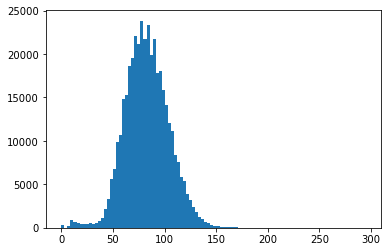

In [19]:
plt.hist(weight, bins=100)
plt.show()

In [20]:
weight_mean = np.mean(weight)

In [21]:
for i in range(len(weight)):
    if weight[i]==0:
        weight[i]=weight_mean

In [22]:
min(weight) # There are some unreasonable weight still, but I'll ignore for now because most data are ok.

0.454

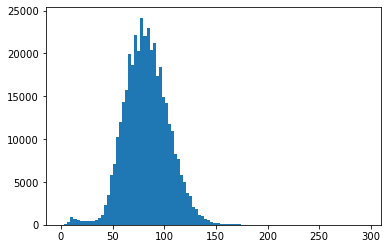

In [23]:
plt.hist(weight, bins=100)
plt.show()

In [24]:
df['INIT_WGT_KG'] = weight

In [25]:
height=[]  # converting height into float, I'm going to replace the error values to mean.
for i in df['INIT_HGT_CM']:
    try:
        height.append(float(i))
    except ValueError:
        height.append(0)

In [26]:
height_mean = np.mean(height)
for i in range(len(height)):
    if height[i]==0:
        height[i]=height_mean

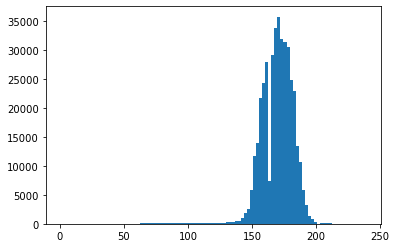

In [27]:
plt.hist(height, bins=100) 
plt.show()
#Interestingly, there is an irregularly less height in the middle. Perhaps just a binning error..?

In [28]:
min(height),max(height) #Here is also some unreasonable heights but I'll ignore them.

(1.0, 238.76)

In [29]:
df['INIT_HGT_CM'] = height

In [30]:
df['INIT_EPTS'].value_counts() # About 1/4 data is unknown '.' EPTS started from 2014, perhaps that's the reason why.

.       132757
1%        6723
2%        4625
5%        4008
4%        3966
         ...  
97%        948
98%        747
99%        703
100%       453
0%          44
Name: INIT_EPTS, Length: 102, dtype: int64

In [31]:
per=[]
for i in df['INIT_EPTS']:
    try:
        per.append(int(i.strip('%.')))
    except ValueError:
        per.append(np.nan)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


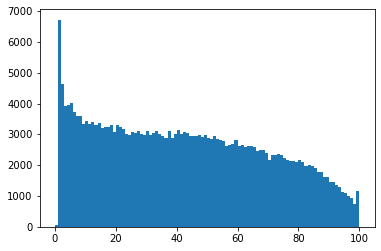

In [32]:
plt.hist(per, bins=100)
plt.show()

In [33]:
df['INIT_EPTS']=per

In [34]:
df['END_EPTS'].value_counts() # Also many '.' this is probably due to EPTS calculation starting 2014.

.      59714
98%     4303
99%     4300
1%      4158
97%     4156
       ...  
22%     3037
24%     3032
47%     2991
45%     2989
0%         4
Name: END_EPTS, Length: 102, dtype: int64

In [35]:
pere=[]
for i in df['END_EPTS']:
    try:
        pere.append(int(i.strip('%.')))
    except ValueError:
        pere.append(np.nan)

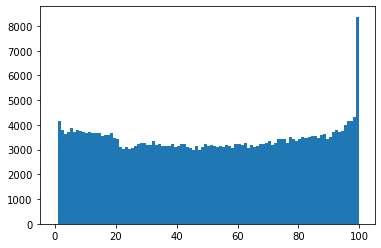

In [36]:
plt.hist(pere, bins=100)
plt.show()

In [37]:
df['END_EPTS']=pere

In [38]:
df['REM_CD'].unique() # Reason for removal from WL. This is a number coded data too probably discard.

array(['9', '.', '13', '8', '4', '43', '14', '7', '15', '24', '12', '17',
       '6', '16', '22', '45', '40', '18', '19', '21'], dtype=object)

In [39]:
df['DAYSWAIT_CHRON'].unique()

array(['10', '2410', '461', ..., 1053, 892, 919], dtype=object)

In [40]:
day=[]
for i in df['DAYSWAIT_CHRON']:
    try:
        day.append(int(i))
    except ValueError:
        day.append(np.nan)

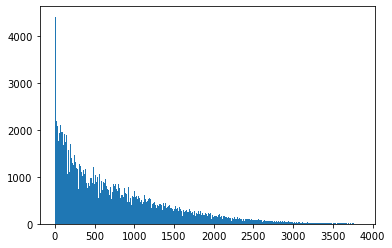

In [41]:
plt.hist(day, bins=1000)
plt.show()

In [42]:
df['DAYSWAIT_CHRON'] = day

In [43]:
df['DAYSWAIT_CHRON'].isna().sum() # Will replace this infor with 'DAYSWAIT_CHRON_KI'

66

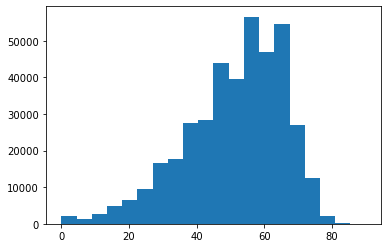

In [44]:
plt.hist(df['INIT_AGE'], bins = 20) # INIT AGE seems to be clean.
plt.show()

In [45]:
df.INIT_AGE[df['INIT_AGE']==0].value_counts()

0    144
Name: INIT_AGE, dtype: int64

In [46]:
df['ACTIVATE_DATE']=pd.to_datetime(df['ACTIVATE_DATE'], errors='coerce') 

In [47]:
df['ACTIVATE_DATE'].isna().sum() # too many data missing, probably disregard.

360278

In [48]:
df['DEATH_DATE'] = pd.to_datetime(df['DEATH_DATE'], errors='coerce') 

In [49]:
df['DEATH_DATE'].isna().sum() # too many data missing, probably disregard.

366633

In [50]:
df['INIT_DATE'] = pd.to_datetime(df['INIT_DATE'], errors='coerce')

In [51]:
min(df['INIT_DATE']), max(df['INIT_DATE'])

(Timestamp('2011-01-02 00:00:00'), Timestamp('2021-06-30 00:00:00'))

In [52]:
df['year'] = df['INIT_DATE'].dt.year # I added 'year' column for future analysis

In [53]:
yearly = df['year'].value_counts()

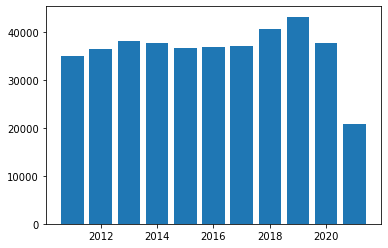

In [54]:
plt.bar(yearly.index, yearly) 
plt.show()
#notice the annual waitlist patients gradually increases, but experienced drop in 2020 due to COVID(?).
#Also 2021 data is not complete because it's up to June 30, 2021.

In [55]:
df['ETHNICITY'].value_counts() # 0: Non-hispanic, 1: Hispanic

0    327091
1     73451
Name: ETHNICITY, dtype: int64

In [56]:
df['ETHCAT'].value_counts() # Also numeric values, not sure where to find the exact category

1    175330
2    114755
4     72577
5     28911
6      3562
9      3513
7      1894
Name: ETHCAT, dtype: int64

In [57]:
bmi=[]  # converting BMI into float
for i in df['INIT_BMI_CALC']:
    try:
        bmi.append(float(i))
    except ValueError:
        bmi.append(0)

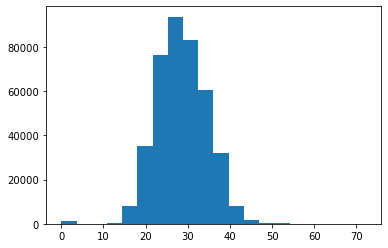

In [58]:
plt.hist(bmi,bins=20)
plt.show()

In [59]:
bmi_mean = np.mean(bmi)
for i in range(len(bmi)):
    if bmi[i]==0:
        bmi[i]=bmi_mean

In [60]:
df['INIT_BMI_CALC'] = bmi

In [61]:
df['INACT_REASON_CD'].value_counts() # probably won't use this info. 

.     265075
3      52820
7      42010
4       8162
2       6635
12      5884
8       5403
9       4411
14      3518
5       2888
1       1555
16       973
6        793
10       268
13       147
Name: INACT_REASON_CD, dtype: int64

In [62]:
df['WL_ID_CODE'].value_counts() # seems like everyone is waitlisted can discard this info.

1574911    1
1219334    1
1415910    1
1485422    1
1434345    1
          ..
1447272    1
1443178    1
1445227    1
1455468    1
1572864    1
Name: WL_ID_CODE, Length: 400542, dtype: int64

In [63]:
df['AGE_DIAB'].value_counts() #About 1/2 data '.' meaning not diabetic. maybe I'll disregard this info.

.     247450
40      8361
30      6648
50      5750
35      5560
       ...  
77         8
78         5
81         4
80         2
79         2
Name: AGE_DIAB, Length: 83, dtype: int64

In [64]:
df['PERM_STATE_TRR'].value_counts() 
#State of residency at transplant (for only received patients. -use with transplant data)

CA    18108
TX    14326
NY    11659
FL    10466
IL     7629
PA     6891
OH     6006
MI     5290
NJ     5068
NC     5034
VA     4986
GA     4712
MD     4386
AZ     4165
MO     3269
MA     3149
TN     3127
WA     3106
IN     2862
WI     2748
MN     2704
SC     2604
CO     2320
AL     2294
LA     2100
KY     1861
CT     1757
IA     1723
OK     1695
MS     1574
KS     1493
OR     1476
UT     1390
AR     1273
NV     1256
NE     1119
NM      936
WV      821
PR      784
ID      758
RI      518
ME      518
NH      512
DC      508
HI      477
DE      447
SD      426
ND      353
MT      338
AK      240
WY      208
VT      163
VI       23
ZZ       19
AS        6
GU        4
MP        2
Name: PERM_STATE_TRR, dtype: int64

In [65]:
df['TX_DATE'] = pd.to_datetime(df['TX_DATE'], errors='coerce')

In [66]:
df['TX_DATE'].isna().sum() # exactly same number, use this to count wait date.

234121

In [67]:
df['TXKID'].value_counts() # Simultaneous kidney L,R,E Not sure so proabaly discard.

L    101999
R     61969
E      2453
Name: TXKID, dtype: int64

In [68]:
df['NPKID'].value_counts() # number of transplant kidney keep this info.

.    234121
0    148908
1     15654
2      1681
3       165
4        12
5         1
Name: NPKID, dtype: int64

In [69]:
df['NPKID'].replace('.',np.nan, inplace=True)

In [70]:
df['NPKID'].value_counts() # I replaced '.' with nan. Recip data.

0    148908
1     15654
2      1681
3       165
4        12
5         1
Name: NPKID, dtype: int64

In [71]:
df['AGE_DON'].value_counts() # I replaced '.' with nan, Recip data, contains 2 missing values.

.     234123
49      3914
48      3882
47      3805
46      3782
       ...  
80         5
81         2
86         1
88         1
84         1
Name: AGE_DON, Length: 86, dtype: int64

In [72]:
df['AGE_DON'].replace('.',np.nan, inplace=True)

In [73]:
df['ETHCAT_DON'].value_counts() # number coded not sure if I'll keep this info.

.    234121
1    114881
4     23698
2     19996
5      4861
9      1648
6       920
7       417
Name: ETHCAT_DON, dtype: int64

In [74]:
df['ETHCAT_DON'].replace('.',np.nan, inplace=True)

In [75]:
df['CITIZENSHIP_DON'].value_counts() #number coded probably discard.

.      235783
1      151599
998      6683
4        4864
6         841
5         623
2         101
3          48
Name: CITIZENSHIP_DON, dtype: int64

In [76]:
df['ABO_DON'].value_counts()

O      86349
A      30278
A1     23600
B      16798
A2      4463
AB      2475
A1B     1698
A2B      760
Name: ABO_DON, dtype: int64

In [77]:
df['GENDER_DON'].value_counts() 
#interestingly, the male female ratio is about the same. despite male being more needed.

M    89326
F    77095
Name: GENDER_DON, dtype: int64

In [78]:
df['GENDER_DON'].replace({'M':0,'F':1}, inplace = True) #same as before male 0, female 1.

In [79]:
df['GENDER_DON'].value_counts()

0.0    89326
1.0    77095
Name: GENDER_DON, dtype: int64

In [80]:
df['HOME_STATE_DON'].value_counts() 
# use 'PERM_STATE_TRR' and 'HOME_STATE_DON' to compare donnor and tranplant state.
# about 3000 values missing

CA    15261
TX    14039
FL    10288
PA     8279
NY     8092
IL     6816
OH     6464
MI     5386
NC     4904
NJ     4677
GA     4491
VA     4105
TN     3921
AZ     3910
MO     3888
WI     3727
IN     3493
MD     3339
WA     3271
MA     3152
CO     2796
MN     2748
OK     2494
LA     2472
SC     2471
KY     2249
AL     2228
NV     1804
KS     1789
UT     1755
CT     1742
OR     1712
IA     1615
MS     1499
AR     1209
NE     1088
NM     1081
WV      997
PR      956
ID      887
ME      816
DE      715
NH      696
HI      579
MT      512
AK      484
SD      423
RI      409
DC      399
ND      333
WY      313
VT      272
ZZ       65
AS       12
VI       10
GU        9
MP        3
Name: HOME_STATE_DON, dtype: int64

In [81]:
df['LIV_DON_TY'].value_counts() # relationship with living donor discard. 

.      347238
999     12867
4        8674
2        7034
9        6641
7        6353
1        4100
6        3385
10       2557
11        767
5         481
8         336
3          76
15         30
14          2
12          1
Name: LIV_DON_TY, dtype: int64

In [82]:
df['LIV_DON_TY_OSTXT'].value_counts() 
# text description, can use with previous info for analysis 
# Interestingly, friends and sig. other was the most living donors, than family members..?

FRIEND/SIGNIFICANT OTHER            8479
IN LAW                              1748
COUSIN                              1458
NIECE/NEPHEW                         943
AUNT/UNCLE                           754
                                    ... 
HIGH SCHOOL CLASSMATE                  1
THROUGH FACEBOOK                       1
WIFE'S BROTHER'S CHILD                 1
NABOR GUZMAN                           1
RECIPIENT'S DENTIST FOR 13 YEARS       1
Name: LIV_DON_TY_OSTXT, Length: 711, dtype: int64

In [83]:
df['CITIZEN_COUNTRY_DON'].value_counts() 
#only about 300 data probably discard.
#notice kidney from as far as JPN and KOR!

MEX    123
CAN     42
HON     25
ESV     15
GTL     14
COL     13
UKD     11
BER      9
BRA      9
ECU      8
KOR      8
JMC      7
AUS      6
IND      6
CHI      5
DOR      5
PER      4
SED      4
NET      4
VEN      4
JPN      4
ITL      4
ENG      4
HTI      3
FRA      3
BHS      3
PLD      3
NZD      2
PHL      2
UNK      2
SAF      2
CHL      2
GER      2
TDT      2
CUB      2
PTL      2
IRN      2
SRN      2
CSR      2
RUS      2
DMN      2
ATR      2
VTN      2
BBD      1
STL      1
SKA      1
NGA      1
TCI      1
KEY      1
TWN      1
PRY      1
SLK      1
Name: CITIZEN_COUNTRY_DON, dtype: int64

In [84]:
df['END_STAT_KI'].value_counts() #number coded.

.       234121
4010    158862
4099      7424
4050       100
4060        32
4020         3
Name: END_STAT_KI, dtype: int64

In [85]:
df['ABO_MAT'].value_counts() #numeric value for matching, use this info but compare with ABO, ABO_DON for more info.

1.0    146963
2.0     17079
3.0      2379
Name: ABO_MAT, dtype: int64

In [86]:
df['AGE'].value_counts() #recip age, 

.     234121
61      4633
60      4620
59      4606
62      4595
       ...  
85         6
0          5
87         4
88         1
89         1
Name: AGE, Length: 91, dtype: int64

In [87]:
df['AGE'].replace('.',np.nan, inplace=True)

In [88]:
df['DISTANCE'].value_counts() #Distance from Donor hosp to TX center (nautical miles)

.       234121
0        60434
1         2987
2         2928
3         2578
         ...  
2245         1
3260         1
1768         1
1812         1
1942         1
Name: DISTANCE, Length: 2354, dtype: int64

In [89]:
df['DISTANCE'].replace('.',np.nan, inplace=True)

In [90]:
df['DIAG_KI'].value_counts() #number coded

.       235005
3070     37514
3040     31021
3008     14251
3037     11448
         ...  
3066        12
3049        12
3019         8
3022         8
3062         6
Name: DIAG_KI, Length: 70, dtype: int64

In [91]:
df['DIAG_KI'].replace('.',np.nan, inplace=True)

In [92]:
df['DIAG_OSTXT_KI'].value_counts() #receip diagnosis text - perhaps combine with 'DIAG_KI' for more detail.

UNKNOWN ETIOLOGY                                 1337
UNKNOWN                                          1236
UNCLEAR ETIOLOGY                                  251
CARDIORENAL SYNDROME                              210
OBSTRUCTIVE UROPATHY                              194
                                                 ... 
PAUCI IMMUNE CRESCENTRIC GLOMERULERNEPHRITIS        1
POOR PERFUSION DUE TO CARDIOMYOPATHY                1
BILATERAL URETEROPELVIC JUNCTION OBSTRUCTIONS       1
RENAL DYSPLASIA AND HYPOPLASIA                      1
UNK. ETIOLOGY                                       1
Name: DIAG_OSTXT_KI, Length: 4159, dtype: int64

In [93]:
df['DAYSWAIT_CHRON_KI'].value_counts() 
#similar data with 'DAYSWAIT_CHRON' but only for receip. probably use this data instead.

.       234121
2          950
4          933
3          930
6          881
         ...  
2623         1
2905         1
3632         1
3533         1
3722         1
Name: DAYSWAIT_CHRON_KI, Length: 3272, dtype: int64

In [94]:
day=[]
for i in df['DAYSWAIT_CHRON_KI']:
    try:
        day.append(int(i))
    except ValueError:
        day.append(np.nan)

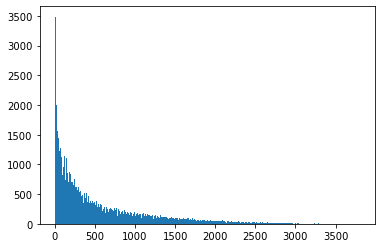

In [95]:
plt.hist(day, bins=1000)
plt.show()

In [96]:
df['TX_PROCEDUR_TY_KI'].value_counts() #number coded transplant procedure probably discard

.      234121
101    101999
102     61969
103      1645
104       808
Name: TX_PROCEDUR_TY_KI, dtype: int64

In [97]:
df['ORGAN'].value_counts() #organ transplanted KI = kidney, KP = kidney pancreas probably discard KP.

KI    166404
KP        17
Name: ORGAN, dtype: int64

In [98]:
df['MED_COND_TRR'].value_counts() #number coded and missing some data, discard.

.    362811
3     36286
2       875
1       570
Name: MED_COND_TRR, dtype: int64

In [99]:
df['PTIME'].value_counts() #patient survival days, discard.

.       236643
3         2003
4         1888
5         1191
366       1018
         ...  
3379         1
3514         1
3363         1
3567         1
3565         1
Name: PTIME, Length: 3597, dtype: int64

In [100]:
df['BMI_CALC'].value_counts() #calculated recip BMI

.       234185
26.6      1394
25.8      1332
25.1      1304
27.3      1272
         ...  
51.2         1
61.8         1
53.2         1
71.8         1
48.5         1
Name: BMI_CALC, Length: 430, dtype: int64

In [101]:
df['BMI_CALC'].replace('.',np.nan, inplace=True)

TRR_ID_CODE is not null to isolate transplant data.

In [102]:
df['ADMISSION_DATE'].value_counts() #recip admission date to hospital maybe discard.

.             236519
12/18/2019       119
12/17/2019       110
05/28/2019       107
01/14/2020       106
               ...  
05/16/2009         1
10/02/2001         1
04/26/2004         1
10/16/1950         1
07/29/1954         1
Name: ADMISSION_DATE, Length: 3874, dtype: int64

In [103]:
df['RECOV_OUT_US'].value_counts() # 31 living donor organ recovered outside US not really important.

N    112420
Y        31
Name: RECOV_OUT_US, dtype: int64

In [104]:
df['ADMIT_DATE_DON'].value_counts() # donor admit date, not really important.

.             288179
02/05/2021        82
07/11/2020        81
05/02/2021        80
04/05/2021        79
               ...  
02/27/2011         1
03/12/2010         1
04/12/2011         1
03/18/2011         1
02/09/2011         1
Name: ADMIT_DATE_DON, Length: 3835, dtype: int64

In [105]:
df['CTR_CODE'].value_counts() #encrypted transplant center code maybe don't need with state info, but keep in case.

Unknown    234121
25110        3114
07223        2911
05487        2720
23901        2668
            ...  
20274           4
11718           3
19065           3
20801           1
02046           1
Name: CTR_CODE, Length: 259, dtype: int64

In [106]:
df['CTR_CODE'].replace('Unknown', np.nan, inplace=True)

In [107]:
df['CTR_CODE'].value_counts()

25110    3114
07223    2911
05487    2720
23901    2668
22196    2665
         ... 
20274       4
11718       3
19065       3
20801       1
02046       1
Name: CTR_CODE, Length: 258, dtype: int64

In [108]:
df['LISTING_CTR_CODE'].value_counts() #encrypted WL center maybe don't need.

21080    9723
5487     7401
23808    6670
23901    6519
14880    5927
         ... 
11718      24
1891       18
20274       5
24862       4
2046        3
Name: LISTING_CTR_CODE, Length: 259, dtype: int64

After exploring every data, I removed some columns and separated into two, waitlist data and transplant data.

In [109]:
df = df.drop(columns=['Unnamed: 0','CITIZENSHIP','INIT_STAT','REM_CD','DAYSWAIT_CHRON',
                 'ACTIVATE_DATE','DEATH_DATE','WLKI','ETHNICITY','INACT_REASON_CD','WL_ID_CODE','AGE_DIAB','TXKID',
                'CITIZENSHIP_DON','LIV_DON_TY','LIV_DON_TY_OSTXT','CITIZEN_COUNTRY_DON','END_STAT_KI',
                'TX_PROCEDUR_TY_KI','MED_COND_TRR','PTIME','ADMISSION_DATE','RECOV_OUT_US','ADMIT_DATE_DON'])

In [110]:
df['GFR'].value_counts()

.          227708
19.0000     13585
18.0000     12690
17.0000     11772
20.0000     11521
            ...  
1.6000          1
1.2000          1
5.7800          1
0.4000          1
14.9900         1
Name: GFR, Length: 198, dtype: int64

In [111]:
df['GFR'].replace('.',np.nan, inplace=True)

In [112]:
gfr=[]
for i in df['GFR']:
    try:
        gfr.append(float(i))
    except:
        print(i)
        gfr.append(999)

In [113]:
df['GFR']=gfr

In [114]:
df.drop(columns=['CITIZEN_COUNTRY'],inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400542 entries, 0 to 400541
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   WL_ORG             400542 non-null  object        
 1   GFR                172834 non-null  float64       
 2   ANTIBODY_TESTED    350916 non-null  object        
 3   GENDER             400542 non-null  int64         
 4   ABO                400542 non-null  object        
 5   PERM_STATE         399721 non-null  object        
 6   DGN_TCR            400542 non-null  object        
 7   DIAB               400542 non-null  int64         
 8   INIT_WGT_KG        400542 non-null  float64       
 9   INIT_HGT_CM        400542 non-null  float64       
 10  INIT_EPTS          267785 non-null  float64       
 11  END_EPTS           340828 non-null  float64       
 12  INIT_AGE           400542 non-null  int64         
 13  INIT_DATE          400542 non-null  datetime

In [116]:
df.drop(columns=['WL_ORG'],inplace=True)

In [117]:
df['DGN_TCR'].value_counts()

3070    115347
3040     73372
999      35856
3008     27542
3037     24980
         ...  
3058        19
3019        17
3066        17
3062        13
3011         1
Name: DGN_TCR, Length: 71, dtype: int64

In [118]:
dgn = [] # -1 is unknown values.
for i in df['DGN_TCR']:
    try:
        dgn.append(int(i))
    except:
        dgn.append(-1)

In [119]:
df['DGN_TCR'] = dgn

In [120]:
df[df['DGN_TCR']==-1]['DGN_TCR'].value_counts()

-1    1663
Name: DGN_TCR, dtype: int64

In [121]:
df['NPKID'].value_counts()

0    148908
1     15654
2      1681
3       165
4        12
5         1
Name: NPKID, dtype: int64

In [122]:
df['NPKID'] = df['NPKID'].astype(float)

In [123]:
df['AGE_DON'].value_counts()

49    3914
48    3882
47    3805
46    3782
36    3740
      ... 
80       5
81       2
86       1
88       1
84       1
Name: AGE_DON, Length: 85, dtype: int64

In [124]:
df['AGE_DON'] = df['AGE_DON'].astype(float)

In [125]:
df['ETHCAT_DON'] = df['ETHCAT_DON'].astype(float)

In [126]:
df['AGE'] = df['AGE'].astype(float)

In [127]:
df['DISTANCE']=df['DISTANCE'].astype(float)

In [128]:
df['DIAG_KI'] = df['DIAG_KI'].astype(float)

In [133]:
days = []
for i in df['DAYSWAIT_CHRON_KI']:
    try:
        days.append(int(i))
    except:
        days.append(np.nan)

In [135]:
df['DAYSWAIT_CHRON_KI'] = days

In [136]:
df['DAYSWAIT_CHRON_KI']=df['DAYSWAIT_CHRON_KI'].astype(float)

In [137]:
bmi =[]
for i in df['BMI_CALC']:
    try:
        bmi.append(float(i))
    except:
        bmi.append(np.nan)

In [138]:
df['BMI_CALC'] = bmi

In [139]:
df['BMI_CALC'].value_counts()

26.6    1394
25.8    1332
25.1    1304
27.3    1272
27.1    1253
        ... 
11.4       1
50.8       1
45.7       1
10.2       1
12.9       1
Name: BMI_CALC, Length: 429, dtype: int64

In [141]:
ctr = []
for i in df['CTR_CODE']:
    try:
        ctr.append(int(i))
    except:
        ctr.append(np.nan)

In [142]:
df['CTR_CODE'] = ctr

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400542 entries, 0 to 400541
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   GFR                172834 non-null  float64       
 1   ANTIBODY_TESTED    350916 non-null  object        
 2   GENDER             400542 non-null  int64         
 3   ABO                400542 non-null  object        
 4   PERM_STATE         399721 non-null  object        
 5   DGN_TCR            400542 non-null  int64         
 6   DIAB               400542 non-null  int64         
 7   INIT_WGT_KG        400542 non-null  float64       
 8   INIT_HGT_CM        400542 non-null  float64       
 9   INIT_EPTS          267785 non-null  float64       
 10  END_EPTS           340828 non-null  float64       
 11  INIT_AGE           400542 non-null  int64         
 12  INIT_DATE          400542 non-null  datetime64[ns]
 13  ETHCAT             400542 non-null  int64   

In [144]:
df.to_csv('kidney.csv')

In [3]:
df = pd.read_csv('kidney.csv')

In [5]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400542 entries, 0 to 400541
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GFR                172834 non-null  float64
 1   ANTIBODY_TESTED    350916 non-null  object 
 2   GENDER             400542 non-null  int64  
 3   ABO                400542 non-null  object 
 4   PERM_STATE         399721 non-null  object 
 5   DGN_TCR            400542 non-null  int64  
 6   DIAB               400542 non-null  int64  
 7   INIT_WGT_KG        400542 non-null  float64
 8   INIT_HGT_CM        400542 non-null  float64
 9   INIT_EPTS          267785 non-null  float64
 10  END_EPTS           340828 non-null  float64
 11  INIT_AGE           400542 non-null  int64  
 12  INIT_DATE          400542 non-null  object 
 13  ETHCAT             400542 non-null  int64  
 14  INIT_BMI_CALC      400542 non-null  float64
 15  PERM_STATE_TRR     163687 non-null  object 
 16  TX

In [44]:
df.PERM_STATE.replace(np.nan, 'ZZ', inplace =True)

In [45]:
df_wl = df

In [46]:
df_t = df_wl[df_wl['TRR_ID_CODE'].notnull()]

In [47]:
df_wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400542 entries, 0 to 400541
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GFR                172834 non-null  float64
 1   ANTIBODY_TESTED    350916 non-null  object 
 2   GENDER             400542 non-null  int64  
 3   ABO                400542 non-null  object 
 4   PERM_STATE         400542 non-null  object 
 5   DGN_TCR            400542 non-null  int64  
 6   DIAB               400542 non-null  int64  
 7   INIT_WGT_KG        400542 non-null  float64
 8   INIT_HGT_CM        400542 non-null  float64
 9   INIT_EPTS          267785 non-null  float64
 10  END_EPTS           340828 non-null  float64
 11  INIT_AGE           400542 non-null  int64  
 12  INIT_DATE          400542 non-null  object 
 13  ETHCAT             400542 non-null  int64  
 14  INIT_BMI_CALC      400542 non-null  float64
 15  PERM_STATE_TRR     163687 non-null  object 
 16  TX

In [48]:
df_t.info() #next time include 'INIT_AGE'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166421 entries, 5 to 400280
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GFR                74807 non-null   float64
 1   ANTIBODY_TESTED    138400 non-null  object 
 2   GENDER             166421 non-null  int64  
 3   ABO                166421 non-null  object 
 4   PERM_STATE         166421 non-null  object 
 5   DGN_TCR            166421 non-null  int64  
 6   DIAB               166421 non-null  int64  
 7   INIT_WGT_KG        166421 non-null  float64
 8   INIT_HGT_CM        166421 non-null  float64
 9   INIT_EPTS          103468 non-null  float64
 10  END_EPTS           130718 non-null  float64
 11  INIT_AGE           166421 non-null  int64  
 12  INIT_DATE          166421 non-null  object 
 13  ETHCAT             166421 non-null  int64  
 14  INIT_BMI_CALC      166421 non-null  float64
 15  PERM_STATE_TRR     163687 non-null  object 
 16  TX

### Regional information and correlation

For this EDA, I would like to bring out two relationship.
One is the number of waitlist as well as number of transplant in each state.
Two is the correlation information.

In [49]:
b = df_t.groupby(['PERM_STATE','year']).size().unstack(fill_value=0).T

In [50]:
a = df_wl.groupby(['PERM_STATE','year']).size().unstack(fill_value=0).T

In [67]:
state = df_wl['PERM_STATE'].unique()

In [68]:
state1=state[:10]
state2=state[10:20]
state3=state[20:30]
state4=state[30:40]
state5=state[40:50]
state6=state[50:]

In [70]:
state6

array(['DC', 'WY', 'VI', 'ND', 'GU', 'MP'], dtype=object)

In [69]:
state6 = np.delete(state6,5)

In [53]:
year = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

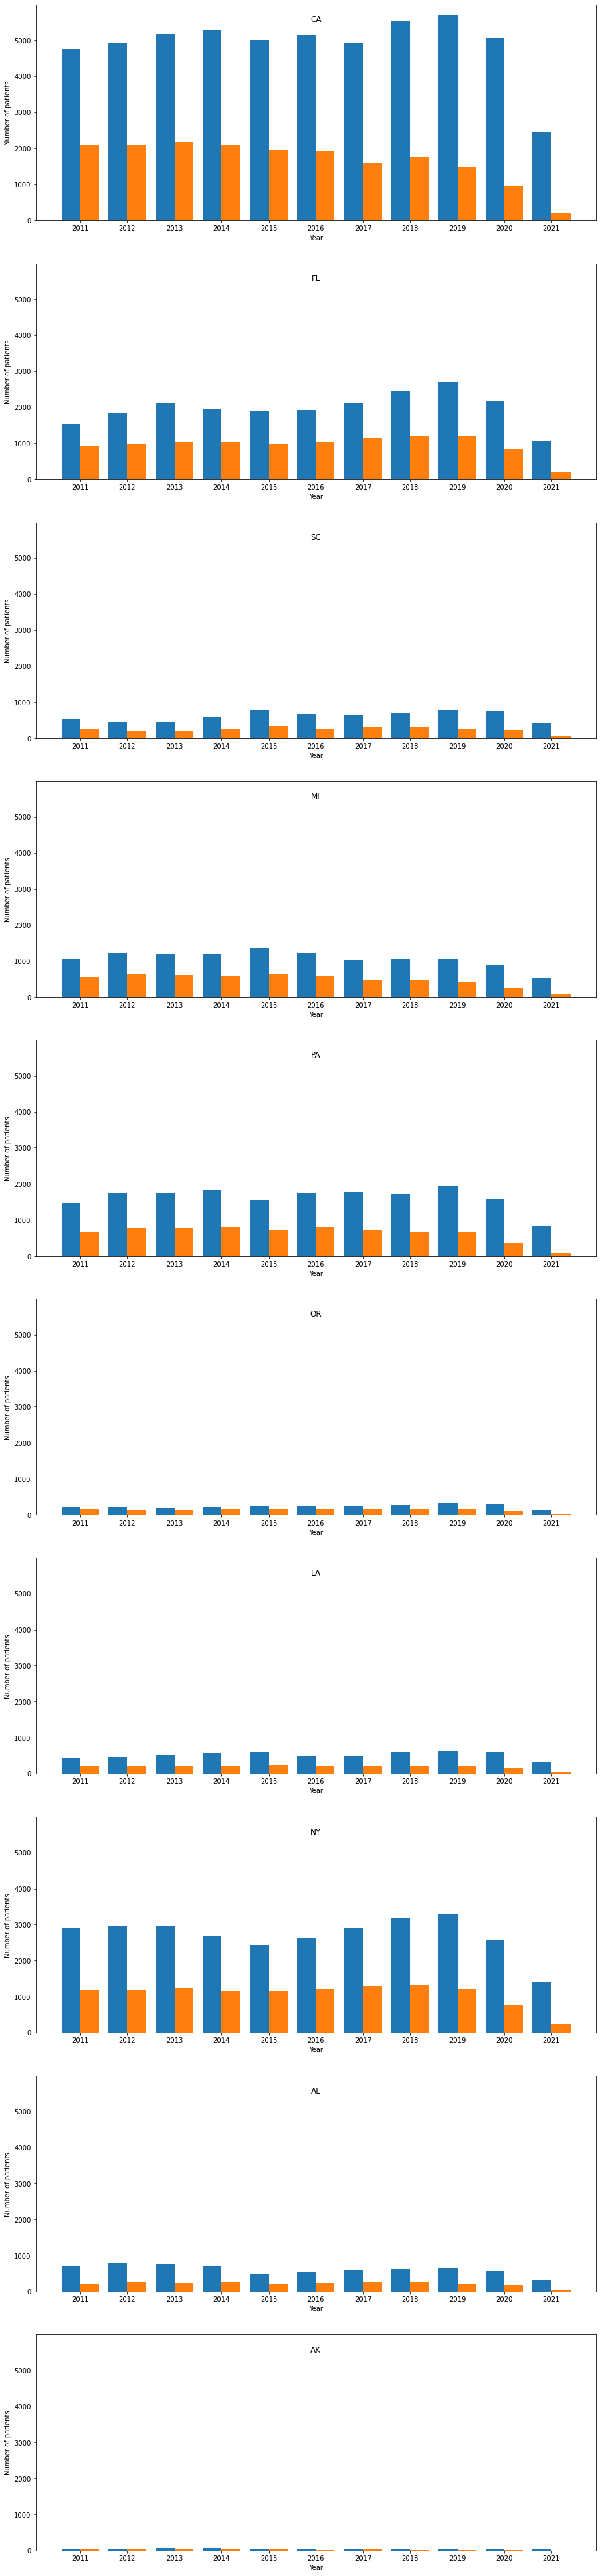

In [35]:
fig, ax = plt.subplots(10,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state1)):
    ax[s].bar(X_axis - 0.2, a[state1[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state1[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state1[s], position=(0.5,0.9))
plt.show()

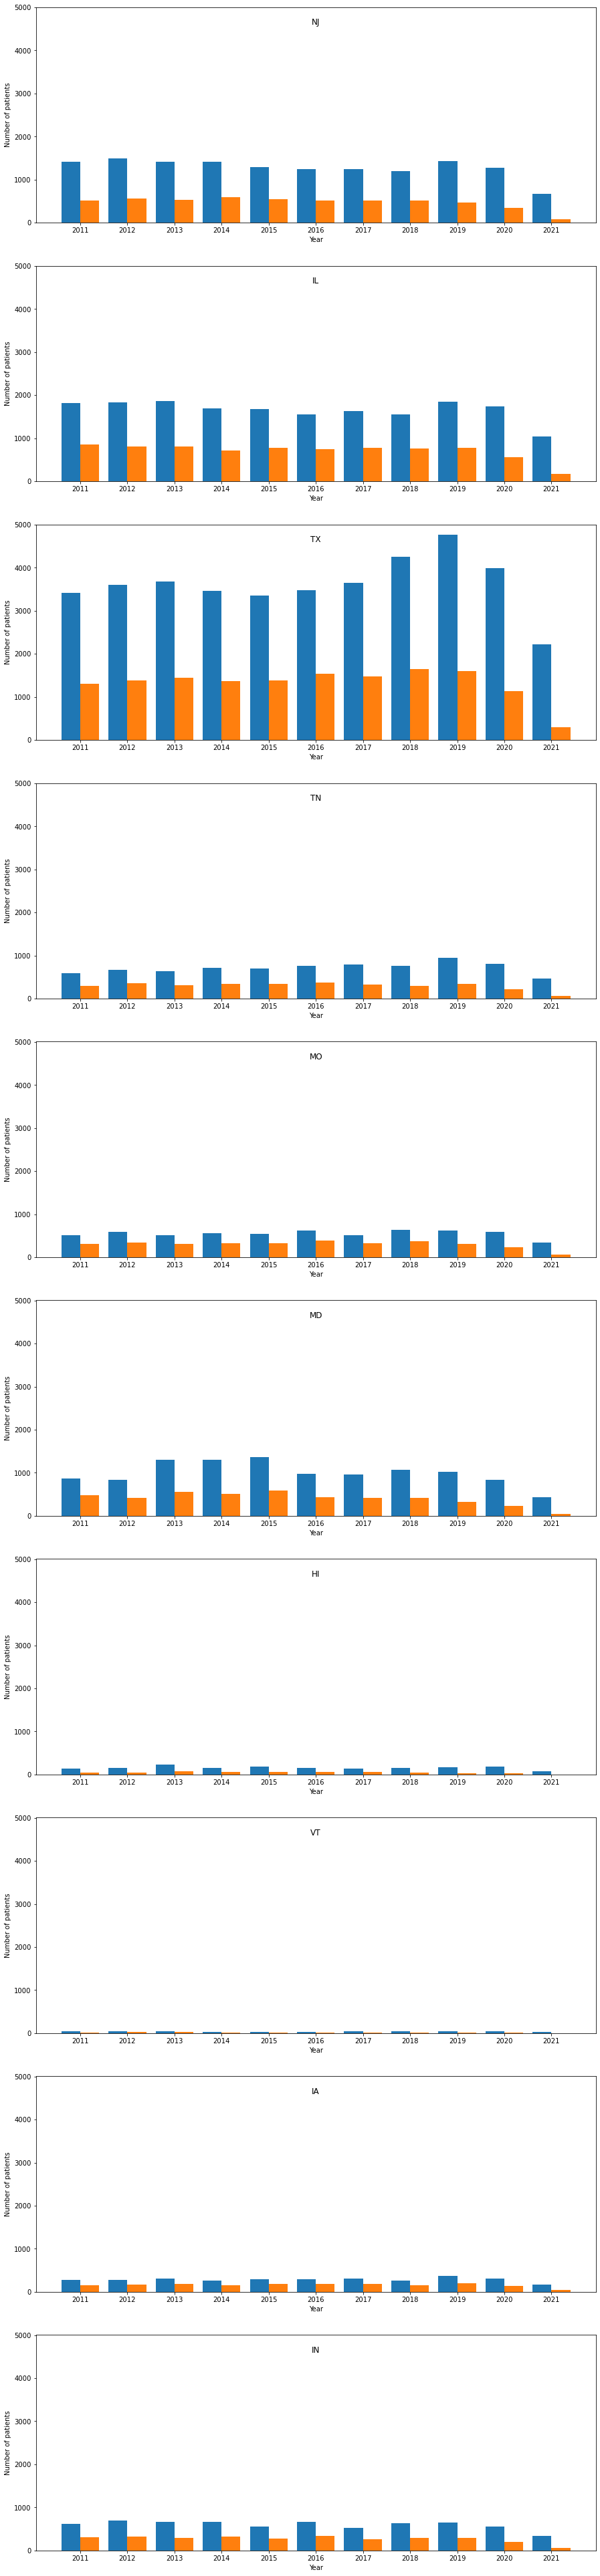

In [36]:
fig, ax = plt.subplots(10,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state2)):
    ax[s].bar(X_axis - 0.2, a[state2[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state2[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state2[s], position=(0.5,0.9))
plt.show()

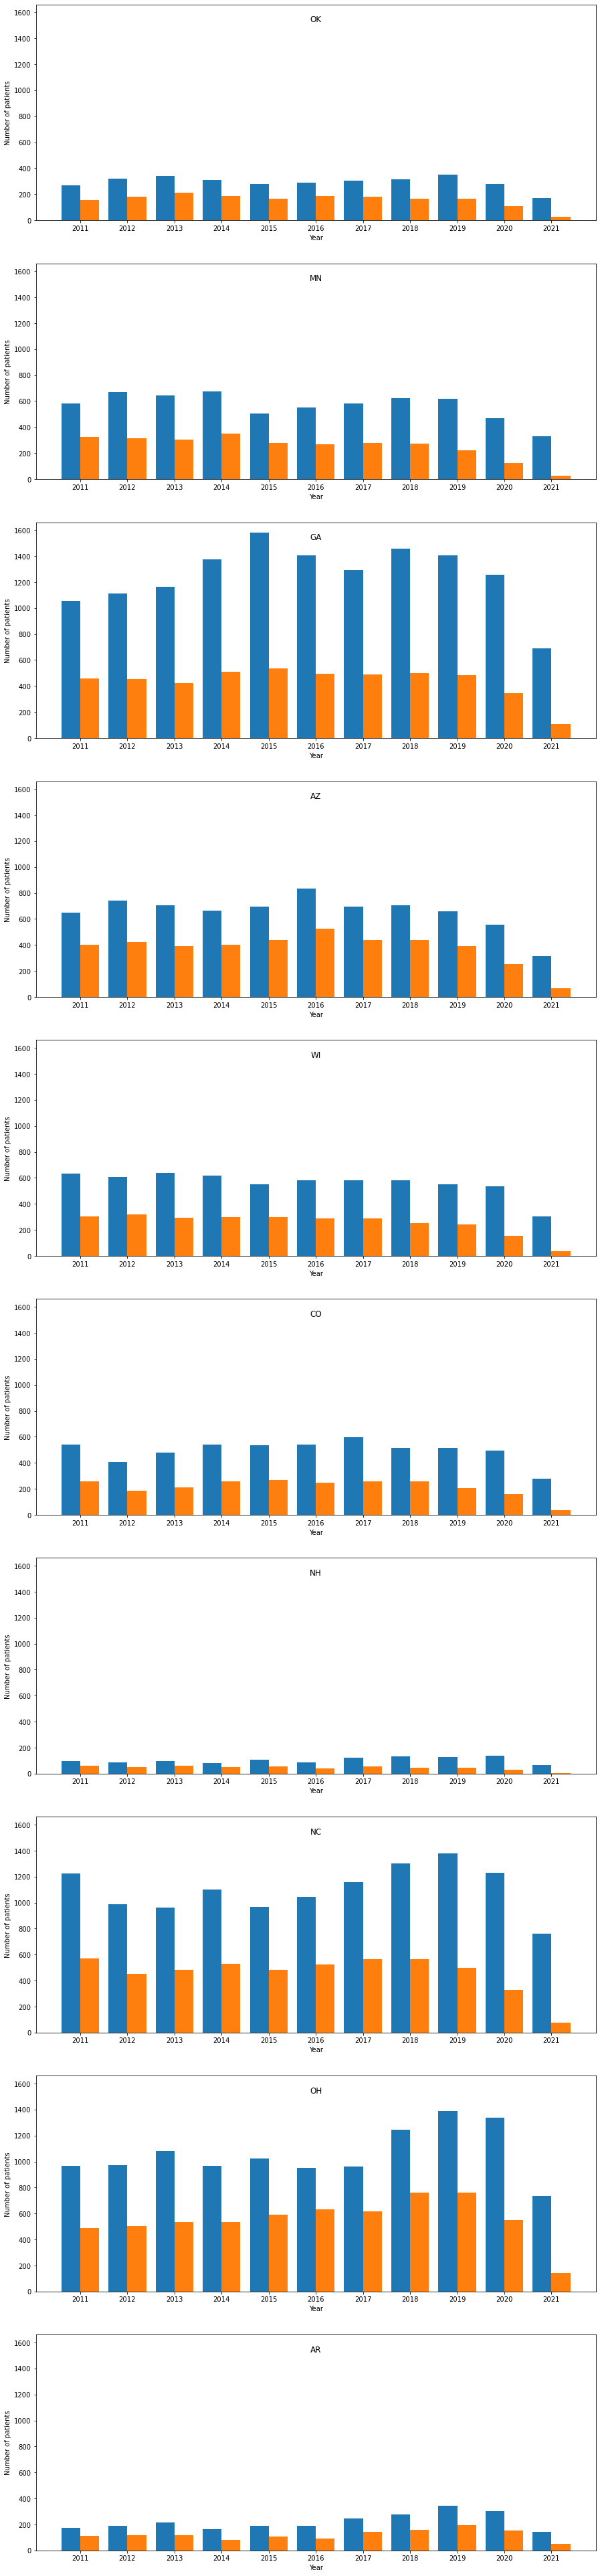

In [37]:
fig, ax = plt.subplots(10,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state3)):
    ax[s].bar(X_axis - 0.2, a[state3[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state3[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state3[s], position=(0.5,0.9))
plt.show()

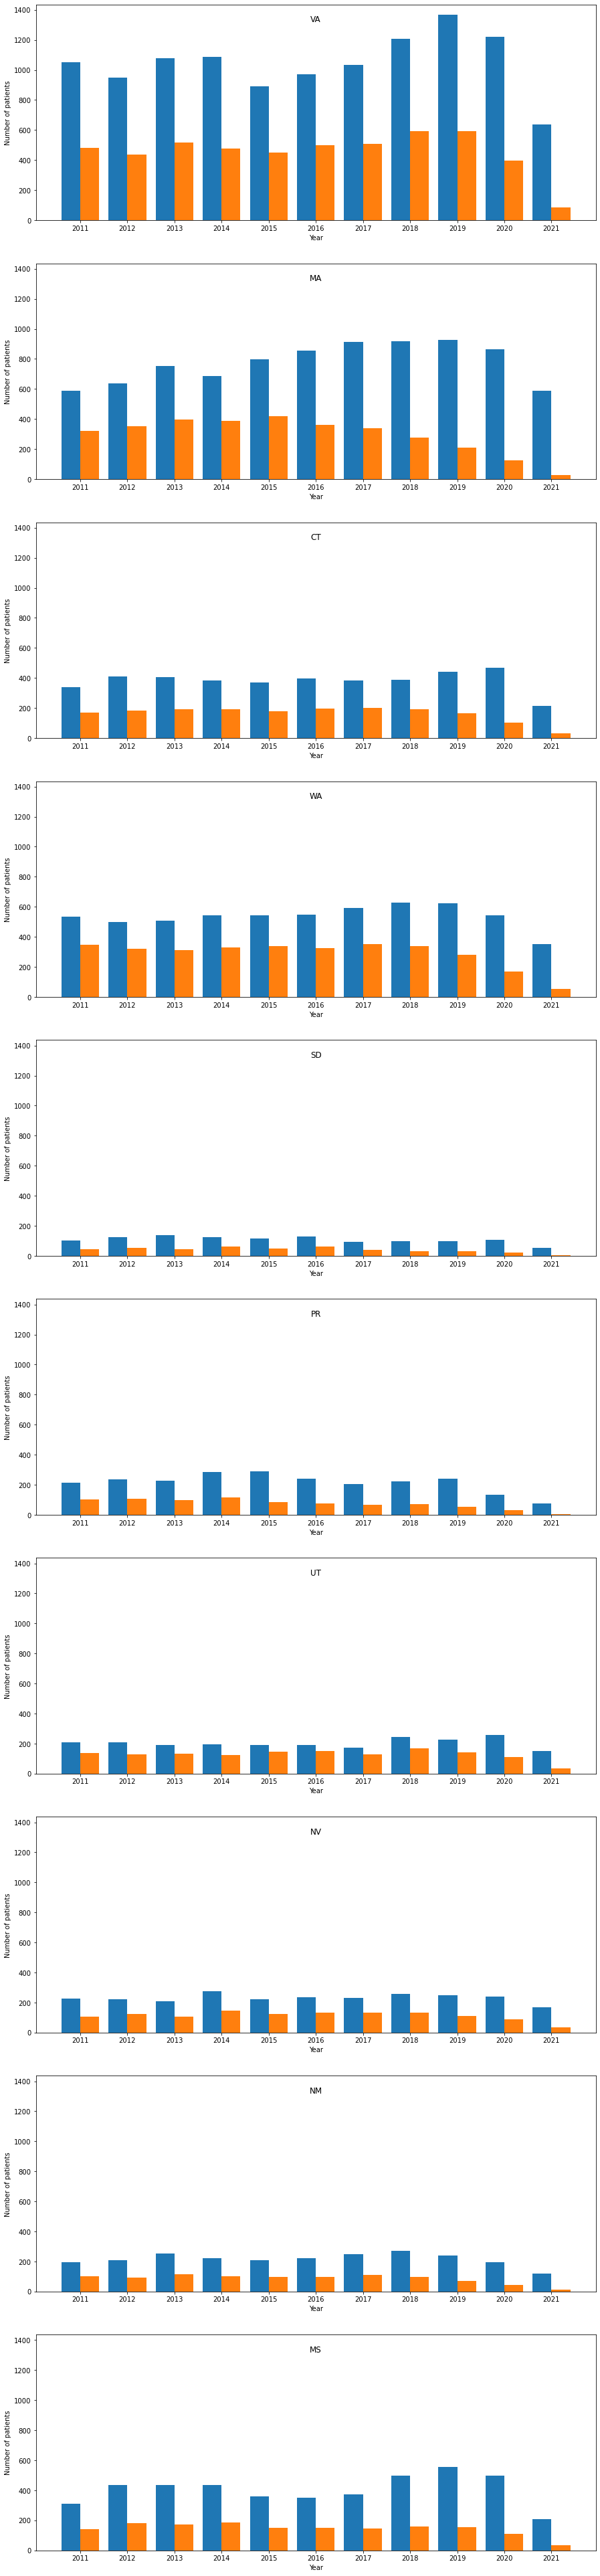

In [38]:
fig, ax = plt.subplots(10,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state4)):
    ax[s].bar(X_axis - 0.2, a[state4[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state4[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state4[s], position=(0.5,0.9))
plt.show()

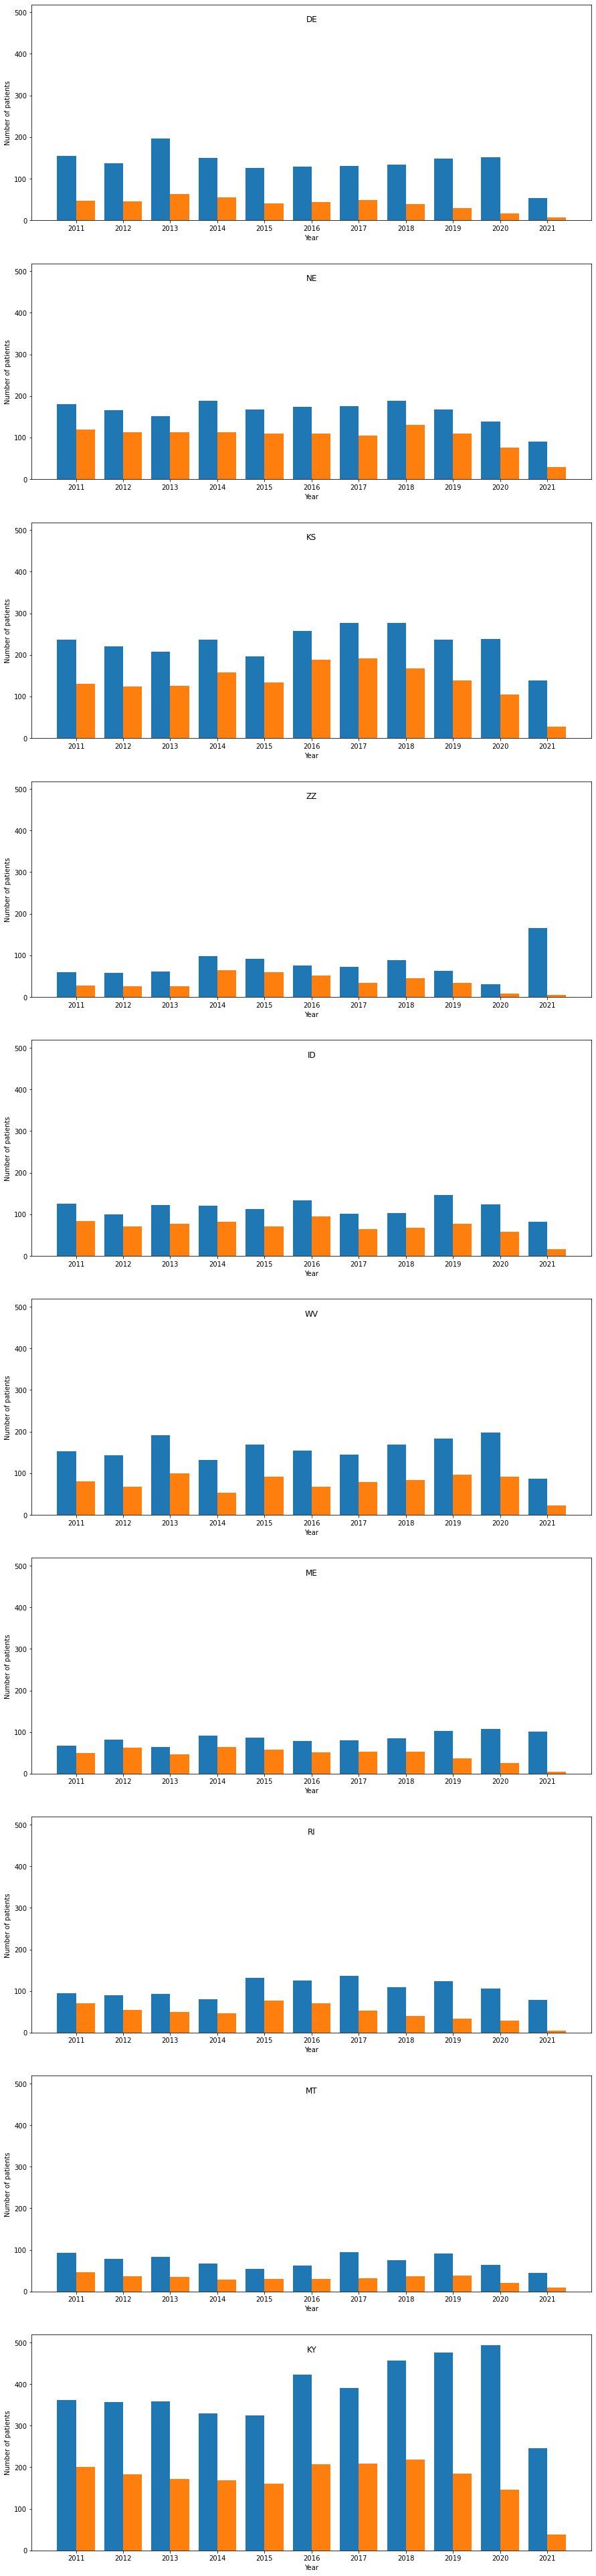

In [54]:
fig, ax = plt.subplots(10,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state5)):
    ax[s].bar(X_axis - 0.2, a[state5[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state5[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state5[s], position=(0.5,0.9))
plt.show()

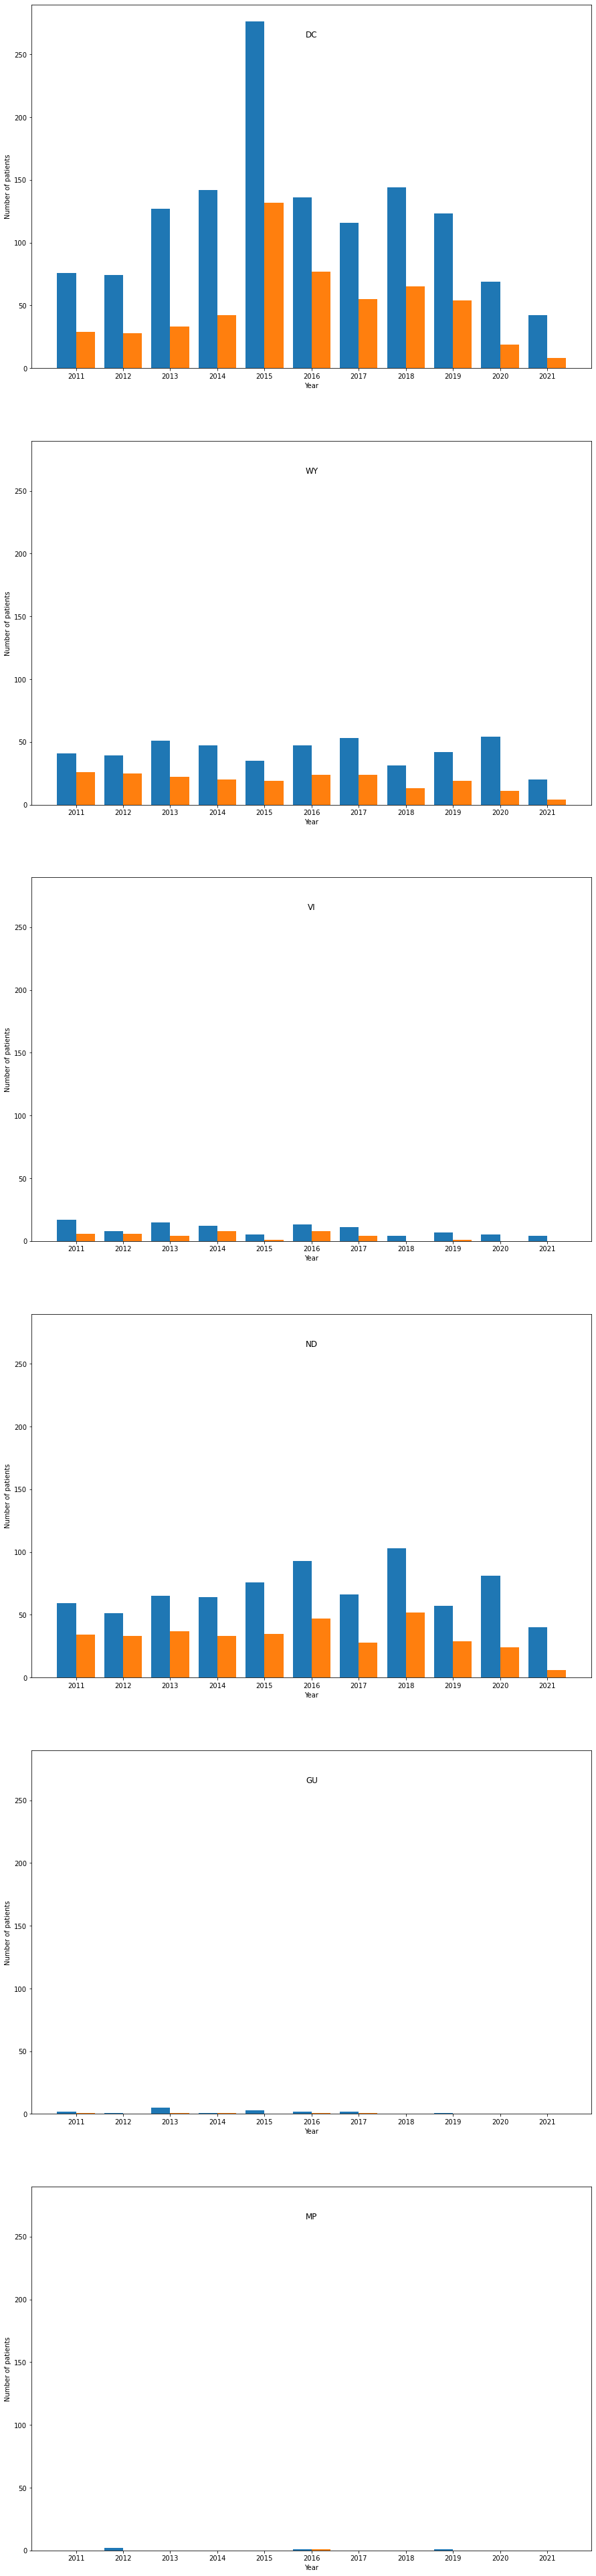

In [71]:
fig, ax = plt.subplots(6,sharey=True,figsize=(15,70))
X_axis = np.arange(len(year))
for s in np.arange(len(state6)):
    ax[s].bar(X_axis - 0.2, a[state6[s]],0.4, label='waitlist')
    ax[s].bar(X_axis + 0.2, b[state6[s]],0.4, label='transplant')
    ax[s].set_xticks(X_axis)
    ax[s].set_xticklabels(year)
    ax[s].set_xlabel('Year')
    ax[s].set_ylabel('Number of patients')
    ax[s].set_title(state6[s], position=(0.5,0.9))
plt.show()

For sure, the graphs show that demand and supply for each state is different. Overall, only half of the organs are being transplanted which indicates that organs are in short supply.

## Correlation graphs

In order to include the State information into the correlation, I need to find ways to represent states with numbers. I decided to take a ratio of transplant/waitlisted instead of state name.

In [74]:
a = df_wl.groupby(['PERM_STATE']).size()

In [75]:
b = df_t.groupby(['PERM_STATE']).size()

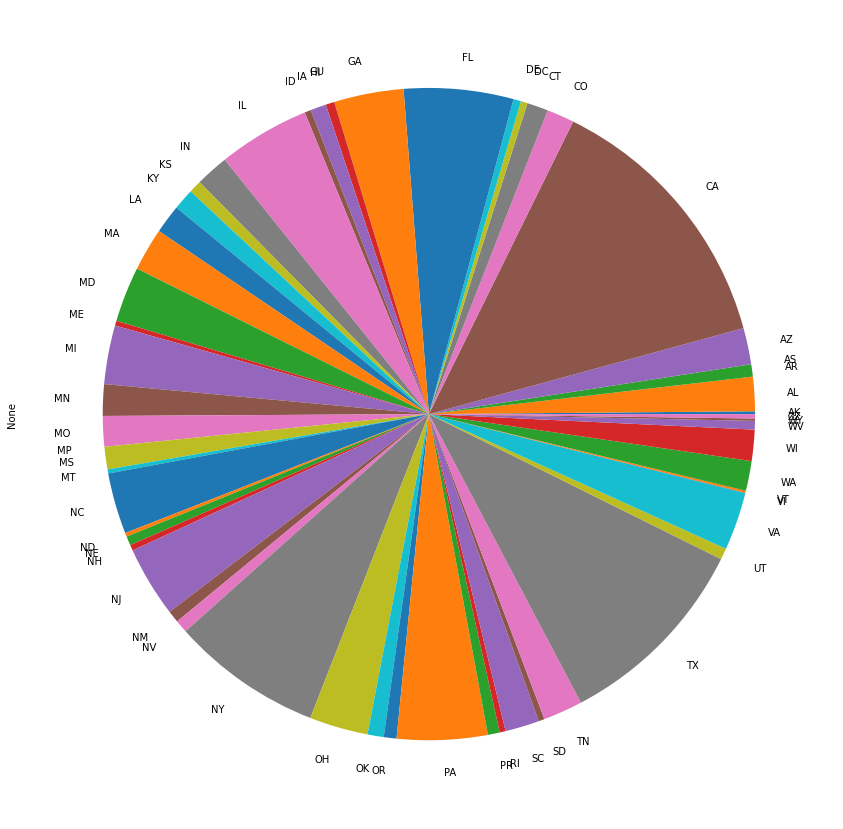

In [85]:
fig, ax = plt.subplots()
a.plot(kind='pie')
fig.set_size_inches(15,15)
plt.show()

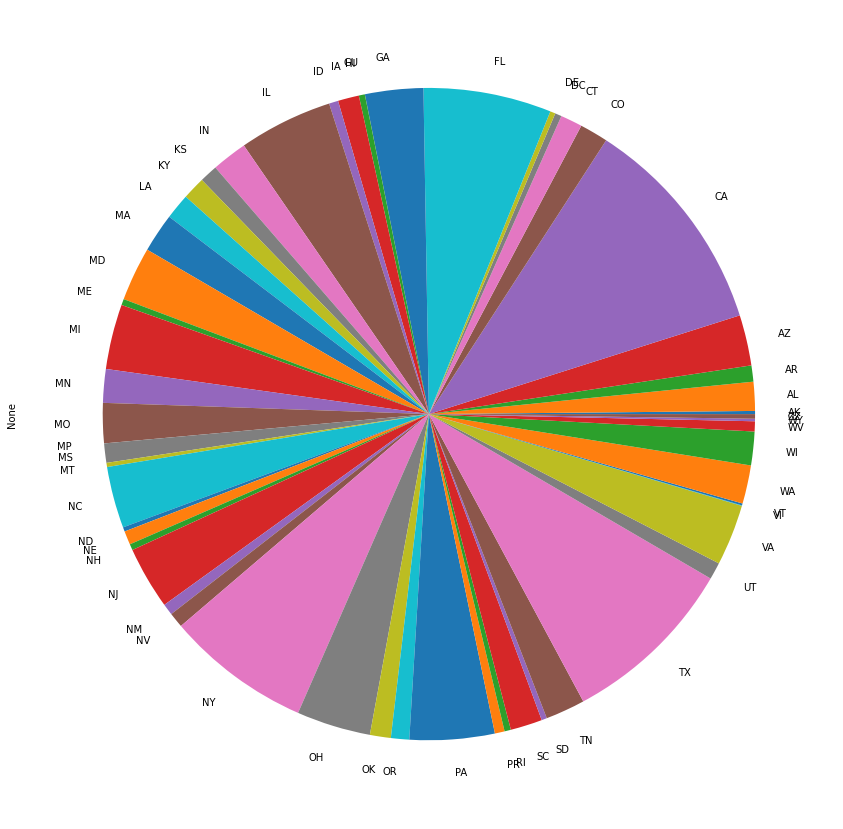

In [86]:
fig, ax = plt.subplots()
b.plot(kind='pie')
fig.set_size_inches(15,15)
plt.show()

In [93]:
state = list(a.index)

In [95]:
ratio = b/a

In [104]:
df = df.merge(ratio.rename('ratio'), how='left', left_on ='PERM_STATE',right_index=True )

In [105]:
df.head()

,GFR,ANTIBODY_TESTED,GENDER,ABO,PERM_STATE,DGN_TCR,DIAB,INIT_WGT_KG,INIT_HGT_CM,INIT_EPTS,...,DIAG_KI,DIAG_OSTXT_KI,DAYSWAIT_CHRON_KI,ORGAN,BMI_CALC,TRR_ID_CODE,CTR_CODE,LISTING_CTR_CODE,year,ratio
0,19.0,YA,0,O,CA,3037,5,68.039,175.26,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21080,2016,0.338278
1,NaN,YN,0,A,CA,3011,5,70.307,182.88,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15283,2014,0.338278
2,NaN,NaN,1,O,FL,3069,2,67.500,162.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248,2011,0.486126
3,NaN,NaN,1,B,SC,3070,2,58.000,153.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11532,2011,0.388404
4,NaN,YA,1,A,SC,3069,2,53.000,155.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11532,2012,0.388404


In [106]:
df_wl = df

In [107]:
df_t = df_wl[df_wl['TRR_ID_CODE'].notnull()]

In [108]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166421 entries, 5 to 400280
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GFR                74807 non-null   float64
 1   ANTIBODY_TESTED    138400 non-null  object 
 2   GENDER             166421 non-null  int64  
 3   ABO                166421 non-null  object 
 4   PERM_STATE         166421 non-null  object 
 5   DGN_TCR            166421 non-null  int64  
 6   DIAB               166421 non-null  int64  
 7   INIT_WGT_KG        166421 non-null  float64
 8   INIT_HGT_CM        166421 non-null  float64
 9   INIT_EPTS          103468 non-null  float64
 10  END_EPTS           130718 non-null  float64
 11  INIT_AGE           166421 non-null  int64  
 12  INIT_DATE          166421 non-null  object 
 13  ETHCAT             166421 non-null  int64  
 14  INIT_BMI_CALC      166421 non-null  float64
 15  PERM_STATE_TRR     163687 non-null  object 
 16  TX

In [129]:
df_cor = df_t.drop(columns=['GFR','ANTIBODY_TESTED', 'ABO', 'PERM_STATE','INIT_DATE','PERM_STATE_TRR','TX_DATE',
                          'ABO_DON','HOME_STATE_DON','DIAG_OSTXT_KI','ORGAN','TRR_ID_CODE','year','CTR_CODE','LISTING_CTR_CODE',
                           'AGE_DON','ETHCAT_DON','GENDER_DON','AGE'])

In [130]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166421 entries, 5 to 400280
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GENDER             166421 non-null  int64  
 1   DGN_TCR            166421 non-null  int64  
 2   DIAB               166421 non-null  int64  
 3   INIT_WGT_KG        166421 non-null  float64
 4   INIT_HGT_CM        166421 non-null  float64
 5   INIT_EPTS          103468 non-null  float64
 6   END_EPTS           130718 non-null  float64
 7   INIT_AGE           166421 non-null  int64  
 8   ETHCAT             166421 non-null  int64  
 9   INIT_BMI_CALC      166421 non-null  float64
 10  NPKID              166421 non-null  float64
 11  ABO_MAT            166421 non-null  float64
 12  DISTANCE           166421 non-null  float64
 13  DIAG_KI            165537 non-null  float64
 14  DAYSWAIT_CHRON_KI  166421 non-null  float64
 15  BMI_CALC           166357 non-null  float64
 16  ra

In [112]:
import seaborn as sns

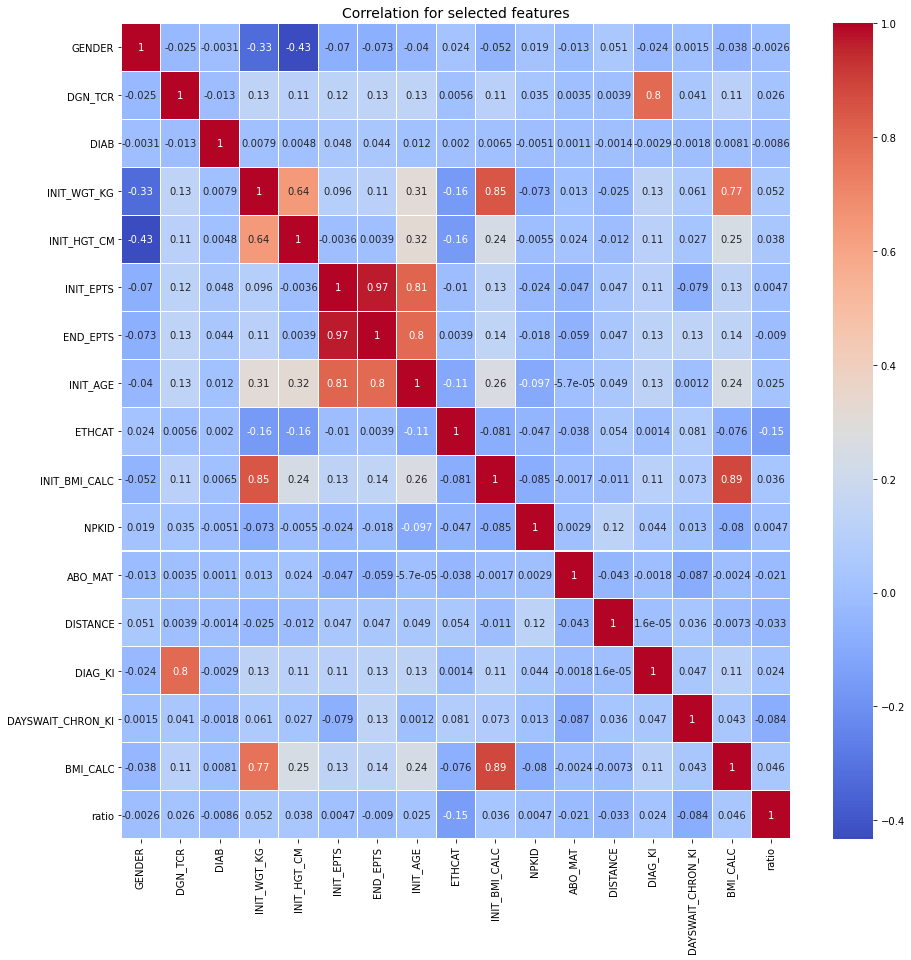

In [131]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df_cor.corr(), ax=ax, annot =True, cmap='coolwarm',linewidths=.05)
fig.set_size_inches(15,15)
ax.set_title('Correlation for selected features', fontsize =14)
plt.show()

Unfortunately, I couldn't find any particular correlation with the heatmap.
Some features that stood out were INIT_EPTS, END_EPTS, ETHCAT, BMI, Blood, and state ratio.